# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

# Pulling tweets using Tweepy

# Twitter File

In [2]:
df = pd.read_csv('scraped_tweets.csv')

In [3]:
df

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,nunthekneee,🇳🇬 🇮🇳 🇬🇧 Passionate Global Multitalented Artis...,London,19,2,103,140,This y’all’s Jacques? #LoveIsland #jacques #Ta...,"['LoveIsland', 'jacques', 'TashaGhouri', 'Andr..."
1,1,Laurengannie,north east gal trying to survive Oxford,NaN,111,52,119,63,"mental health this, mental health that, until ...",['loveisland']
2,2,Itsnotbay,Don’t look over here. dp by @makowwka,NaN,1080,133,28767,10,Jacques mocking Tasha is his private story is ...,[]
3,3,niseeslife,"Tweeting about Reality 📺 shows, #XboxSeriesX g...",🇨🇦,26,113,3495,0,Here we go again another #GemmaOwen &amp; #Luc...,"['GemmaOwen', 'LucaBish', 'LoveIsland']"
4,4,09chlo_,🇺🇬x🇷🇼,3005,407,499,42186,331,This man’s relationship glow up needs to be st...,[]
...,...,...,...,...,...,...,...,...,...,...
995,995,R_x_b_y,NaN,NaN,248,280,1934,140,This y’all’s Jacques? #LoveIsland #jacques #Ta...,"['LoveIsland', 'jacques', 'TashaGhouri', 'Andr..."
996,996,JoannamikaX,New account.,"London, England",146,74,4457,57,WHO ELSE COLLAPSED #loveIsland https://t.co/5S...,['loveIsland']
997,997,She_is_loud,"For as long as capitalism is running things, t...",NaN,48,5,105,208,#Damiyah in third place ❤️ get these guys a sp...,"['Damiyah', 'LoveIsland']"
998,998,afrorckprincess,23 🇬🇧🇯🇲 • founder @blkfemicideuk • digital art...,Neverland,3833,9728,319099,174,May the best heartbreaker win 😭❤️\n\n#LoveIsla...,"['LoveIsland', 'Damiyah']"


# EDA

In [4]:
df.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,nunthekneee,🇳🇬 🇮🇳 🇬🇧 Passionate Global Multitalented Artis...,London,19,2,103,140,This y’all’s Jacques? #LoveIsland #jacques #Ta...,"['LoveIsland', 'jacques', 'TashaGhouri', 'Andr..."
1,1,Laurengannie,north east gal trying to survive Oxford,NaN,111,52,119,63,"mental health this, mental health that, until ...",['loveisland']
2,2,Itsnotbay,Don’t look over here. dp by @makowwka,NaN,1080,133,28767,10,Jacques mocking Tasha is his private story is ...,[]
3,3,niseeslife,"Tweeting about Reality 📺 shows, #XboxSeriesX g...",🇨🇦,26,113,3495,0,Here we go again another #GemmaOwen &amp; #Luc...,"['GemmaOwen', 'LucaBish', 'LoveIsland']"
4,4,09chlo_,🇺🇬x🇷🇼,3005,407,499,42186,331,This man’s relationship glow up needs to be st...,[]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1000 non-null   int64 
 1   username      1000 non-null   object
 2   description   770 non-null    object
 3   location      538 non-null    object
 4   following     1000 non-null   int64 
 5   followers     1000 non-null   int64 
 6   totaltweets   1000 non-null   int64 
 7   retweetcount  1000 non-null   int64 
 8   text          1000 non-null   object
 9   hashtags      1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [6]:
df.isnull().sum()

Unnamed: 0        0
username          0
description     230
location        462
following         0
followers         0
totaltweets       0
retweetcount      0
text              0
hashtags          0
dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', 'username', 'description', 'location', 'following',
       'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags'],
      dtype='object')

In [8]:
text_df = df.drop(['Unnamed: 0', 'username', 'description', 'location', 'following',
       'followers', 'totaltweets', 'retweetcount'], axis=1)

text_df

,text,hashtags
0,This y’all’s Jacques? #LoveIsland #jacques #Ta...,"['LoveIsland', 'jacques', 'TashaGhouri', 'Andr..."
1,"mental health this, mental health that, until ...",['loveisland']
2,Jacques mocking Tasha is his private story is ...,[]
3,Here we go again another #GemmaOwen &amp; #Luc...,"['GemmaOwen', 'LucaBish', 'LoveIsland']"
4,This man’s relationship glow up needs to be st...,[]
...,...,...
995,This y’all’s Jacques? #LoveIsland #jacques #Ta...,"['LoveIsland', 'jacques', 'TashaGhouri', 'Andr..."
996,WHO ELSE COLLAPSED #loveIsland https://t.co/5S...,['loveIsland']
997,#Damiyah in third place ❤️ get these guys a sp...,"['Damiyah', 'LoveIsland']"
998,May the best heartbreaker win 😭❤️\n\n#LoveIsla...,"['LoveIsland', 'Damiyah']"


# Drop Duplicates

In [9]:
text_df.drop_duplicates(inplace = True)
text_df

,text,hashtags
0,This y’all’s Jacques? #LoveIsland #jacques #Ta...,"['LoveIsland', 'jacques', 'TashaGhouri', 'Andr..."
1,"mental health this, mental health that, until ...",['loveisland']
2,Jacques mocking Tasha is his private story is ...,[]
3,Here we go again another #GemmaOwen &amp; #Luc...,"['GemmaOwen', 'LucaBish', 'LoveIsland']"
4,This man’s relationship glow up needs to be st...,[]
...,...,...
981,#LoveIsland still trending two days later is j...,['LoveIsland']
983,Back into the Ice Tunnels I go to finish off t...,[]
986,Indiyah being on just 600k doesn’t feel right ...,"['LoveIsland', 'Indiyah', 'loveislandusa', 'Da..."
997,#Damiyah in third place ❤️ get these guys a sp...,"['Damiyah', 'LoveIsland']"


# Sentiment Analysis Using VADER

In [11]:
nltk.download('vader_lexicon')
#importing sentimentintensityanaylzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to C:\Users\Muhammad
[nltk_data]     Toqeer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
vader = SentimentIntensityAnalyzer()
text_df['Negative_score'] = text_df['text'].apply(lambda x: vader.polarity_scores(x)['neg'])
text_df['Neutral_score'] = text_df['text'].apply(lambda x: vader.polarity_scores(x)['neu'])
text_df['Positive_score'] = text_df['text'].apply(lambda x: vader.polarity_scores(x)['pos'])
text_df['Compound_score'] = text_df['text'].apply(lambda x: vader.polarity_scores(x)['compound'])
text_df.head(10)

,text,hashtags,Negative_score,Neutral_score,Positive_score,Compound_score
0,This y’all’s Jacques? #LoveIsland #jacques #Ta...,"['LoveIsland', 'jacques', 'TashaGhouri', 'Andr...",0.000,1.000,0.000,0.0000
1,"mental health this, mental health that, until ...",['loveisland'],0.000,1.000,0.000,0.0000
2,Jacques mocking Tasha is his private story is ...,[],0.216,0.716,0.067,-0.6994
3,Here we go again another #GemmaOwen &amp; #Luc...,"['GemmaOwen', 'LucaBish', 'LoveIsland']",0.000,1.000,0.000,0.0000
4,This man’s relationship glow up needs to be st...,[],0.138,0.808,0.054,-0.5859
7,Our TASHA would like you to put all your eggs ...,[],0.000,0.819,0.181,0.8481
8,@LoveIsland Have Paige and jacques seen eachot...,[],0.000,1.000,0.000,0.0000
9,Great post from #LoveIsland reddit on Jacques ...,['LoveIsland'],0.000,0.745,0.255,0.6249
11,its 9PM… #LoveIsland https://t.co/sud6nXHftQ,['LoveIsland'],0.000,1.000,0.000,0.0000
12,Yeah Indiyah and Dami have my full attention ❤...,"['LoveIsland', 'damiyah']",0.000,0.833,0.167,0.2960


In [13]:
def SentimentPredict(sentiment):
    if sentiment >= 0.35:
        return "Positive"
    elif sentiment <= -0.05: 
        return "Negative"
    else:
        return "Neutral"
text_df['Sentiment'] =text_df['Compound_score'].apply(lambda x: SentimentPredict(x))
text_df.head(10)

,text,hashtags,Negative_score,Neutral_score,Positive_score,Compound_score,Sentiment
0,This y’all’s Jacques? #LoveIsland #jacques #Ta...,"['LoveIsland', 'jacques', 'TashaGhouri', 'Andr...",0.000,1.000,0.000,0.0000,Neutral
1,"mental health this, mental health that, until ...",['loveisland'],0.000,1.000,0.000,0.0000,Neutral
2,Jacques mocking Tasha is his private story is ...,[],0.216,0.716,0.067,-0.6994,Negative
3,Here we go again another #GemmaOwen &amp; #Luc...,"['GemmaOwen', 'LucaBish', 'LoveIsland']",0.000,1.000,0.000,0.0000,Neutral
4,This man’s relationship glow up needs to be st...,[],0.138,0.808,0.054,-0.5859,Negative
7,Our TASHA would like you to put all your eggs ...,[],0.000,0.819,0.181,0.8481,Positive
8,@LoveIsland Have Paige and jacques seen eachot...,[],0.000,1.000,0.000,0.0000,Neutral
9,Great post from #LoveIsland reddit on Jacques ...,['LoveIsland'],0.000,0.745,0.255,0.6249,Positive
11,its 9PM… #LoveIsland https://t.co/sud6nXHftQ,['LoveIsland'],0.000,1.000,0.000,0.0000,Neutral
12,Yeah Indiyah and Dami have my full attention ❤...,"['LoveIsland', 'damiyah']",0.000,0.833,0.167,0.2960,Neutral


Positive    157
Neutral     145
Negative    127
Name: Sentiment, dtype: int64


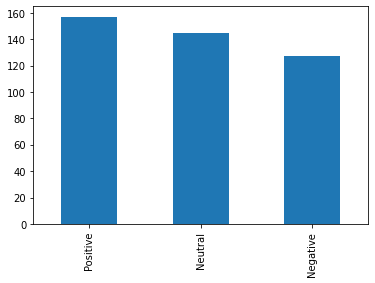

In [14]:
text_df['Sentiment'].value_counts().plot(kind='bar')
print(text_df['Sentiment'].value_counts())

# Cleaning Tweet for WordCloud

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Muhammad
[nltk_data]     Toqeer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Clean the Text
# Create a function to clean the text

def CleanText(text):
    text = text.lower()
    text = re.sub("'", "", text) # to avoid removing contractions in english
    text = re.sub("@[A-Za-z0-9_]+","",text) # Removing Mentions
    text = re.sub("#","",text) # Removing Hashtags symbol
    text = re.sub(r"rt[\s]+", "", text) # Removing RT
    text = re.sub(r"http\S+", "", text) # Removing hyperlink
    text = re.sub(r"www.\S+", "", text) # Removing hyperlink
    text = re.sub("[()!?]", " ", text) # Removes Matching single character present in the list
    text = re.sub("\[.*?\]", " ", text) # Removes any character except line terminator
    text = re.sub("[^a-z0-9]", " ", text) #Match a single character not present in the list below
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stopwords.words('english')]
    return " ".join(filtered_text)

# Cleaning the text

text_df['text'] = text_df['text'].apply(CleanText)

# show the text
text_df

,text,hashtags,Negative_score,Neutral_score,Positive_score,Compound_score,Sentiment
0,jacques loveisland jacques tashaghouri andrew ...,"['LoveIsland', 'jacques', 'TashaGhouri', 'Andr...",0.000,1.000,0.000,0.0000,Neutral
1,mental health mental health women mental healt...,['loveisland'],0.000,1.000,0.000,0.0000,Neutral
2,jacques mocking tasha private story disgusting...,[],0.216,0.716,0.067,-0.6994,Negative
3,go another gemmaowen amp lucabish issue loveis...,"['GemmaOwen', 'LucaBish', 'LoveIsland']",0.000,1.000,0.000,0.0000,Neutral
4,man relationship glow needs studied point caus...,[],0.138,0.808,0.054,-0.5859,Negative
...,...,...,...,...,...,...,...
981,loveisland still trending two days later remin...,['LoveIsland'],0.091,0.909,0.000,-0.1531,Negative
983,back ice tunnels go finish smol project made w...,[],0.042,0.958,0.000,-0.2003,Negative
986,indiyah 600k feel right tbh go follow loveisla...,"['LoveIsland', 'Indiyah', 'loveislandusa', 'Da...",0.000,1.000,0.000,0.0000,Neutral
997,damiyah third place get guys spin show asap lo...,"['Damiyah', 'LoveIsland']",0.000,1.000,0.000,0.0000,Neutral


# Lemmatization Tweets

In [17]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
text_df['text']=text_df['text'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [18]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")

jacques loveisland jacques tashaghouri andrew ekinsu davide indiyah dami damiyah ekinde 

mental health mental health woman mental health right jacques loveisland 

jacques mocking tasha private story disgusting coward move week ago advocating mental health loveisland 



# WordCloud for Positive Tweets

In [19]:
pos_tweets = text_df[text_df.Sentiment == "Positive"]
pos_tweets.sort_values(['Compound_score'], ascending=False)
pos_tweets.head()

,text,hashtags,Negative_score,Neutral_score,Positive_score,Compound_score,Sentiment
7,tasha would like put egg one basket crack adop...,[],0.0,0.819,0.181,0.8481,Positive
9,great post loveisland reddit jacques paige sho...,['LoveIsland'],0.0,0.745,0.255,0.6249,Positive
14,wait tasha andrew become couple forgets love i...,[],0.0,0.726,0.274,0.8516,Positive
15,tasha reuniting dad adorable loveisland,['LoveIsland'],0.0,0.714,0.286,0.4939,Positive
16,aamirkhan koffeewithkaran really super fun epi...,"['AamirKhan', 'KoffeeWithKaran', 'KaranJohar']",0.0,0.607,0.393,0.9131,Positive


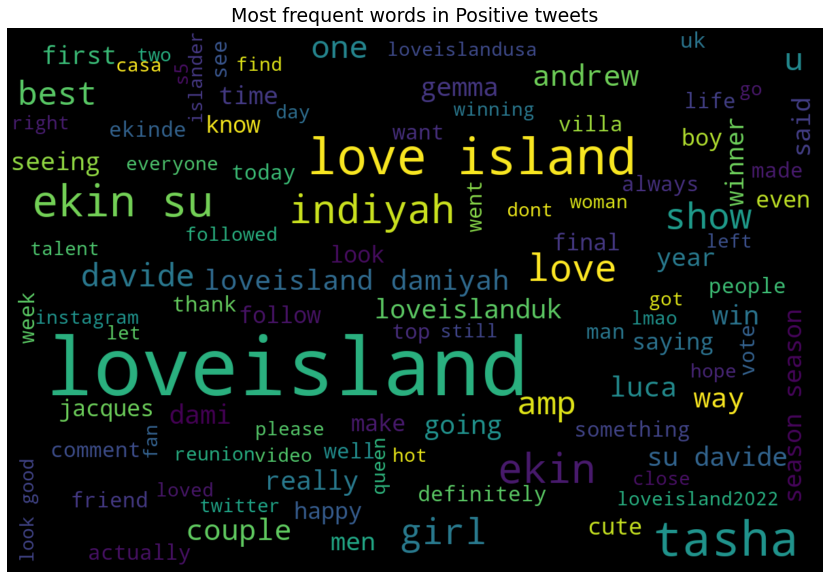

In [20]:
# Plot the WordCloud
text = ' '.join(tweets for tweets in pos_tweets["text"])
plt.figure(figsize=(15,10), facecolor='None')
wordcloud = WordCloud(max_words=100, width=1200, height=800, random_state=21, max_font_size=119).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Positive tweets', fontsize=19)
plt.show()

# WordCloud for Negative Tweets

In [21]:
neg_tweets = text_df[text_df.Sentiment == "Negative"]
neg_tweets.sort_values(['Compound_score'], ascending=False)
neg_tweets.head()

,text,hashtags,Negative_score,Neutral_score,Positive_score,Compound_score,Sentiment
2,jacques mocking tasha private story disgusting...,[],0.216,0.716,0.067,-0.6994,Negative
4,man relationship glow need studied point cause...,[],0.138,0.808,0.054,-0.5859,Negative
17,victim blaming huh loveisland,['LoveISland'],0.595,0.405,0.000,-0.7070,Negative
24,love island put statement bullying let luca bu...,[],0.301,0.654,0.045,-0.9507,Negative
28,literally mocking another love island contesta...,['LoveIsland'],0.201,0.671,0.128,-0.3400,Negative


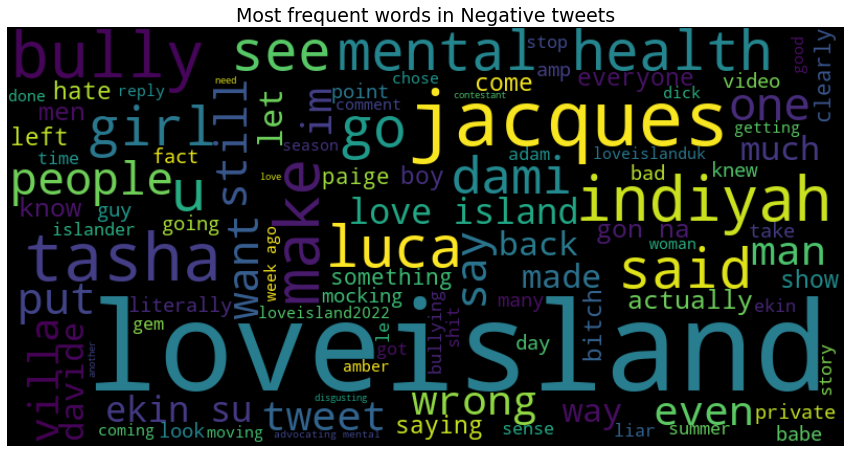

In [22]:
# Plot the WordCloud
text = ' '.join(tweets for tweets in neg_tweets["text"])
plt.figure(figsize=(15,10), facecolor='None')
wordcloud = WordCloud(max_words=100, width=800, height=400, random_state=21, max_font_size=119).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Negative tweets', fontsize=19)
plt.show()

# WordCloud for Neutral Tweets


In [23]:
neu_tweets = text_df[text_df.Sentiment == "Neutral"]
neu_tweets.sort_values(['Compound_score'], ascending=False)
neu_tweets.head()

,text,hashtags,Negative_score,Neutral_score,Positive_score,Compound_score,Sentiment
0,jacques loveisland jacques tashaghouri andrew ...,"['LoveIsland', 'jacques', 'TashaGhouri', 'Andr...",0.0,1.0,0.0,0.0,Neutral
1,mental health mental health woman mental healt...,['loveisland'],0.0,1.0,0.0,0.0,Neutral
3,go another gemmaowen amp lucabish issue loveis...,"['GemmaOwen', 'LucaBish', 'LoveIsland']",0.0,1.0,0.0,0.0,Neutral
8,paige jacques seen eachother since left villa,[],0.0,1.0,0.0,0.0,Neutral
11,9pm loveisland,['LoveIsland'],0.0,1.0,0.0,0.0,Neutral


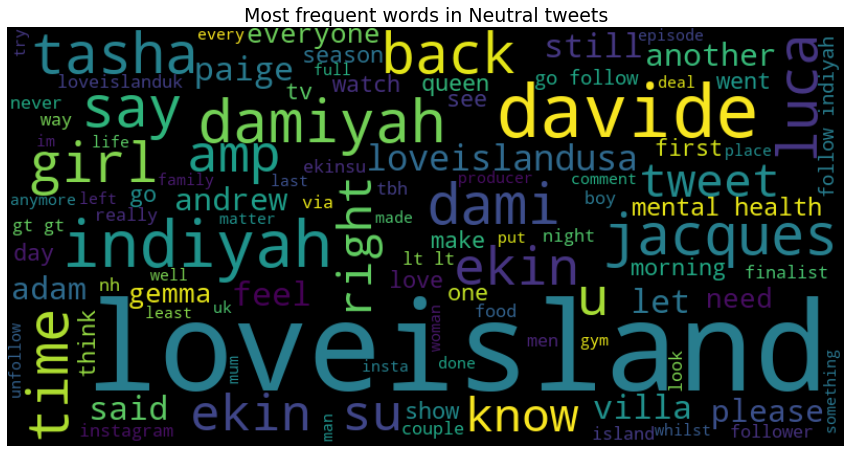

In [24]:
# Plot the WordCloud
text = ' '.join(tweets for tweets in neu_tweets["text"])
plt.figure(figsize=(15,10), facecolor='None')
wordcloud = WordCloud(max_words=100, width=800, height=400, random_state=21, max_font_size=119).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Neutral tweets', fontsize=19)
plt.show()

# Saving dataset in CSV File


In [26]:
text_df.to_csv("Tweets_VADERsentiments.csv", index=False)